In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import svm 

In [2]:
df = pd.read_csv("loan.csv")

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.fillna(method='ffill',inplace=True)
df.fillna(method='bfill',inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

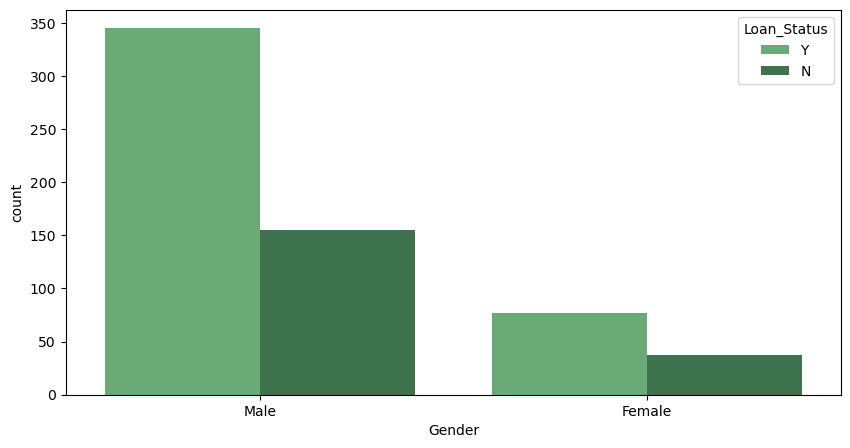

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=df,hue='Loan_Status',palette='Greens_d')
plt.show()

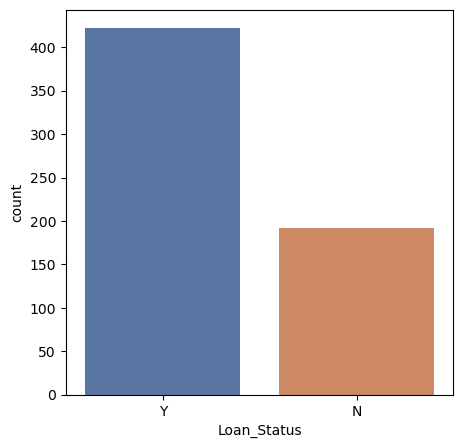

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(x='Loan_Status',data=df,palette='deep')
plt.show()

<Figure size 1000x500 with 0 Axes>

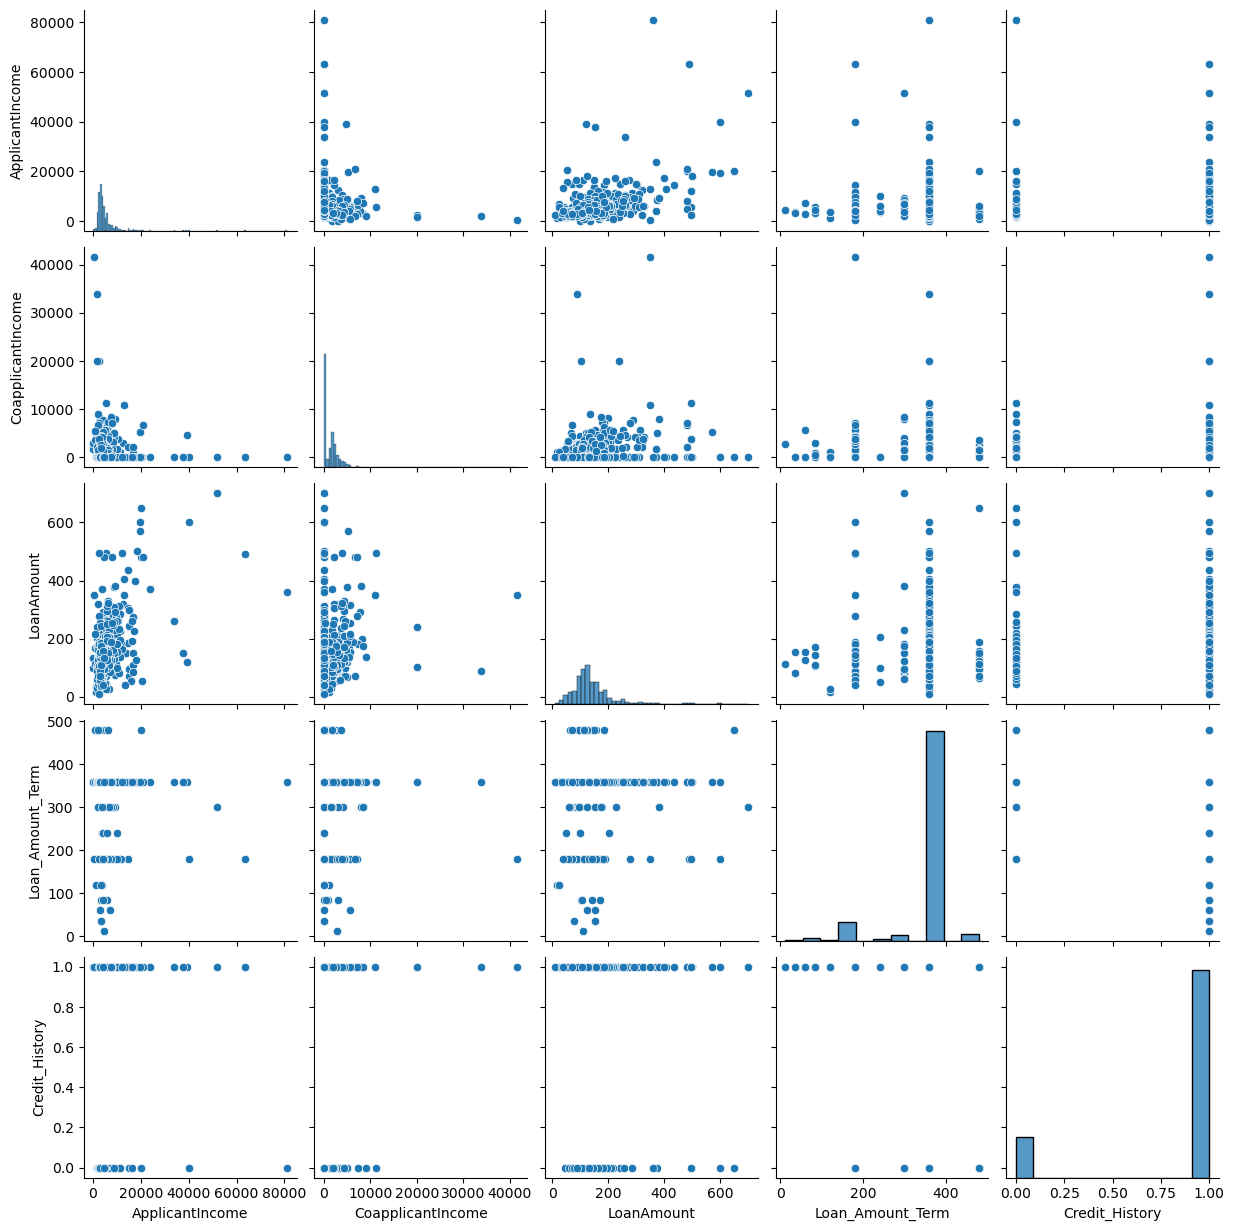

In [10]:
plt.figure(figsize=(10,5))
sns.pairplot(df)
plt.show()

In [11]:
#Removing unwanted columns in the dataset
df.drop('Dependents',axis=1,inplace=True)
df.drop('ApplicantIncome',axis=1,inplace=True)
df.drop('CoapplicantIncome',axis=1,inplace=True)
df.drop('LoanAmount',axis=1,inplace=True)
df.drop('Loan_Amount_Term',axis=1,inplace=True)
df.drop('Credit_History',axis=1,inplace=True)

In [12]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


In [13]:
#Encoding using get_dummies OneHotEncoder
df1=pd.get_dummies(df,columns=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"])
df1.head()

,Loan_ID,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,0,1,1,0,1,0,1,0,0,0,1,0,1
1,LP001003,0,1,0,1,1,0,1,0,1,0,0,1,0
2,LP001005,0,1,0,1,1,0,0,1,0,0,1,0,1
3,LP001006,0,1,0,1,0,1,1,0,0,0,1,0,1
4,LP001008,0,1,1,0,1,0,1,0,0,0,1,0,1


In [14]:
df1.drop('Gender_Female',axis=1,inplace=True)
df1.drop('Married_No',axis=1,inplace=True)
df1.drop('Education_Graduate',axis=1,inplace=True)
df1.drop('Self_Employed_No',axis=1,inplace=True)
df1.drop('Property_Area_Rural',axis=1,inplace=True)
df1.drop('Loan_Status_N',axis=1,inplace=True)

In [16]:
#Splitting our data into training and testing¶
X = df1[["Gender_Male","Married_Yes","Education_Not Graduate","Self_Employed_Yes","Property_Area_Semiurban","Property_Area_Urban"]].values
y=df1["Loan_Status_Y"].values

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LogisticRegression 
m1=LogisticRegression()
m1.fit(xtrain,ytrain)
yp1=m1.predict(xtest)


from sklearn.tree import DecisionTreeClassifier
m2=DecisionTreeClassifier()
m2.fit(xtrain,ytrain)
yp2=m2.predict(xtest)

In [18]:
#Accuracy of two models ( LogisticRegression and DecisionTree )
#Finfing the best model..........
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix 
print("Logistic Regression :")
print(" accuracy is ",accuracy_score(ytest,yp1))
print(" precision score is ",precision_score(ytest,yp1))
print(" recall is ",recall_score(ytest,yp1))
print(" f1 score is ",f1_score(ytest,yp1))
print("                                                                                                              ")
print(" classification report is ",classification_report(ytest,yp1))
print(" confusion matrix is ",confusion_matrix(ytest,yp1))

Logistic Regression :
 accuracy is  0.7154471544715447
 precision score is  0.7310924369747899
 recall is  0.9666666666666667
 f1 score is  0.8325358851674641
                                                                                                              
 classification report is                precision    recall  f1-score   support

           0       0.25      0.03      0.05        33
           1       0.73      0.97      0.83        90

    accuracy                           0.72       123
   macro avg       0.49      0.50      0.44       123
weighted avg       0.60      0.72      0.62       123

 confusion matrix is  [[ 1 32]
 [ 3 87]]


In [19]:
print("Decision Tree Classifier :")
print(" accuracy is ",accuracy_score(ytest,yp2))
print(" precision score is ",precision_score(ytest,yp2))
print(" recall is ",recall_score(ytest,yp2))
print(" f1 score is ",f1_score(ytest,yp2))
print("                                                                                                              ")
print(" classification report is ",classification_report(ytest,yp2))
print(" confusion matrix is ",confusion_matrix(ytest,yp2))

Decision Tree Classifier :
 accuracy is  0.7317073170731707
 precision score is  0.7522123893805309
 recall is  0.9444444444444444
 f1 score is  0.8374384236453202
                                                                                                              
 classification report is                precision    recall  f1-score   support

           0       0.50      0.15      0.23        33
           1       0.75      0.94      0.84        90

    accuracy                           0.73       123
   macro avg       0.63      0.55      0.53       123
weighted avg       0.68      0.73      0.68       123

 confusion matrix is  [[ 5 28]
 [ 5 85]]


In [20]:
print("Logistic Regression :")
print(" accuracy is ",accuracy_score(ytest,yp1))
print(" precision score is ",precision_score(ytest,yp1))
print(" recall is ",recall_score(ytest,yp1))
print(" f1 score is ",f1_score(ytest,yp1))
print("***********************************************************************************************************")
print("Decision Tree Classifier :")
print(" accuracy is ",accuracy_score(ytest,yp2))
print(" precision score is ",precision_score(ytest,yp2))
print(" recall is ",recall_score(ytest,yp2))
print(" f1 score is ",f1_score(ytest,yp2))

Logistic Regression :
 accuracy is  0.7154471544715447
 precision score is  0.7310924369747899
 recall is  0.9666666666666667
 f1 score is  0.8325358851674641
***********************************************************************************************************
Decision Tree Classifier :
 accuracy is  0.7317073170731707
 precision score is  0.7522123893805309
 recall is  0.9444444444444444
 f1 score is  0.8374384236453202


In [21]:
print("Logistic Regression Predictions ",yp1)
print("*****************************************************************************************************************")
print("Decision Tree predictions ",yp2)


Logistic Regression Predictions  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
*****************************************************************************************************************
Decision Tree predictions  [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1]


In [22]:
#Final accuracies of two models are :
print("For Logistic Regression :")
print(" accuracy is ",accuracy_score(ytest,yp1))
print("For Decision tree :")
print(" accuracy is ",accuracy_score(ytest,yp2))

For Logistic Regression :
 accuracy is  0.7154471544715447
For Decision tree :
 accuracy is  0.7317073170731707
